In [9]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [10]:
# Читаем данные
data = pd.read_csv('data.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
# Обрабатываем данные
data.isnull().sum().sort_values(ascending=False)
male_median, female_median = data.query("Sex == 'male'").Age.median(), data.query("Sex == 'female'").Age.median()
data = data.fillna({"Age": male_median}).where(data.Sex == 'male', other=data.fillna({"Age": female_median}))

In [12]:
# Разделяем предикторы и отклик
y = data['Survived']
X = pd.get_dummies(data.drop(columns=['Name', 'Ticket', 'PassengerId', 'Cabin', 'Survived',
                                      'Embarked'], axis=1), dtype=int)
# Разделяем на обучающую выборку и выборку валидации
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [14]:
parameters = {'n_estimators': [10, 20, 30], 'max_depth': range(1, 10), 'bootstrap': [True, False]}
grid = GridSearchCV(RandomForestClassifier(), parameters, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_depth': range(1, 10),
                         'n_estimators': [10, 20, 30]})

In [22]:
best_model = grid.best_estimator_
grid.best_params_

{'bootstrap': True, 'max_depth': 6, 'n_estimators': 30}

In [23]:
best_model.score(X_test, y_test)

0.7864406779661017

In [73]:
best_model.feature_importances_

array([0.14747833, 0.14813971, 0.04990941, 0.04197622, 0.18289803,
       0.18224205, 0.24735626])

<Axes: >

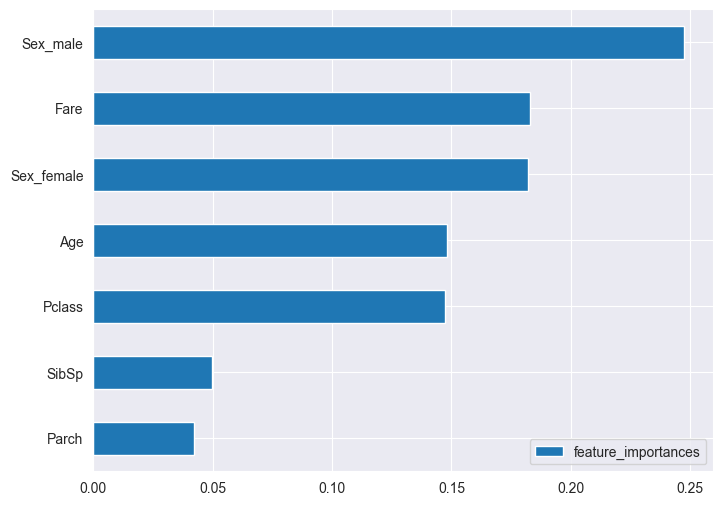

In [72]:
feature_importances = pd.DataFrame(best_model.feature_importances_, columns=['feature_importances'], index=X.columns)
feature_importances.sort_values('feature_importances').plot(kind='barh', figsize=(8, 6))